# **Data Preprocessing for Diabetes Dataset**

In this notebook, we will apply preprocessing steps to the diabetes dataset. The dataset contains various health indicators and a target variable indicating the diabetes status. We will perform the following preprocessing steps:

- 1
- 2
- 3

This preprocessing will prepare the data for further analysis and modeling. 

## **Diabetes Dataset Description**
This dataset contains 22 features, including 17 categorical features such as 'HighBP', 'HighChol', and 'Smoker', and 4 numerical features like 'BMI', 'Age', 'MentHlth', and 'PhysHlth', with a total of 253680 entries.

### Target Variable
- **Diabetes_012**
    - 0 = no diabetes
    - 1 = prediabetes
    - 2 = diabetes

### Features

- **HighBP** (High Blood Pressure)
    - 0 = no high BP
    - 1 = high BP

- **HighChol** (High Cholesterol)
    - 0 = no high cholesterol
    - 1 = high cholesterol

- **CholCheck** (Cholesterol Check)
    - 0 = no cholesterol check in 5 years
    - 1 = yes cholesterol check in 5 years

- **BMI** (Body Mass Index)
    - Body Mass Index

- **Smoker**
    - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
    - 0 = no
    - 1 = yes

- **Stroke**
    - (Ever told) you had a stroke.
    - 0 = no
    - 1 = yes

- **HeartDiseaseorAttack** (Coronary Heart Disease or Myocardial Infarction)
    - 0 = no
    - 1 = yes

- **PhysActivity** (Physical Activity)
    - Physical activity in past 30 days - not including job
    - 0 = no
    - 1 = yes

- **Fruits**
    - Consume fruit 1 or more times per day
    - 0 = no
    - 1 = yes

- **Veggies** (Vegetables)
    - Consume vegetables 1 or more times per day
    - 0 = no
    - 1 = yes

- **HvyAlcoholConsump** (Heavy Alcohol Consumption)
    - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
    - 0 = no
    - 1 = yes

- **AnyHealthcare** (Any Health Care Coverage)
    - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
    - 0 = no
    - 1 = yes

- **NoDocbcCost** (No Doctor Because of Cost)
    - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
    - 0 = no
    - 1 = yes

- **GenHlth** (General Health)
    - Would you say that in general your health is:
        - 1 = excellent
        - 2 = very good
        - 3 = good
        - 4 = fair
        - 5 = poor

- **MentHlth** (Mental Health)
    - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
    - Scale: 1-30 days

- **PhysHlth** (Physical Health)
    - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
    - Scale: 1-30 days

- **DiffWalk** (Difficulty Walking)
    - Do you have serious difficulty walking or climbing stairs?
    - 0 = no
    - 1 = yes

- **Sex**
    - 0 = female
    - 1 = male

- **Age**
    - 13-level age category (_AGEG5YR see codebook)
        -  1 = 18-24
        -  2 = 25-29
        -  3 = 30-34
        -  4 = 35-39
        -  5 = 40-44
        -  6 = 45-49
        -  7 = 50-54
        -  8 = 55-59
        -  9 = 60-64
        - 10 = 65-69
        - 11 = 70-74
        - 12 = 75-79
        - 13 = 80 or older

- **Education**
    - Education level (EDUCA see codebook)
        - 1 = Never attended school or only kindergarten
        - 2 = Grades 1 through 8 (Elementary)
        - 3 = Grades 9 through 11 (Some high school)
        - 4 = Grade 12 or GED (High school graduate)
        - 5 = College 1 year to 3 years (Some college or technical school)
        - 6 = College 4 years or more (College graduate)

- **Income**
    - Income scale (INCOME2 see codebook)
        - 1 = less than $10,000
        - 2 = less than $15,000
        - 3 = less than $20,000
        - 4 = less than $25,000
        - 5 = less than $35,000
        - 6 = less than $50,000
        - 7 = less than $75,000
        - 8 = $75,000 or more


## Imports and Data Loading

In [58]:
# imports
import os
import sys

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # KBinsDiscretizer

sys.path.append(os.path.abspath("../scripts"))

from binning import BinningTransformer

In [60]:
# Read data
df = pd.read_csv("../data/raw/diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Data Inconsistencies

In [56]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound_IQR = Q1 - 1.5 * IQR
upper_bound_IQR = Q3 + 1.5 * IQR

# Identify outliers using IQR
outliers_IQR = df[(df["BMI"] < lower_bound_IQR) | (df["BMI"] > upper_bound_IQR)]

# Calculate the median and MAD
median = df["BMI"].median()
MAD = np.median(np.abs(df["BMI"] - median))

# Define the lower and upper bounds for outliers using MAD
lower_bound_MAD = median - 3 * MAD
upper_bound_MAD = median + 3 * MAD

# Identify outliers using MAD
outliers_MAD = df[(df["BMI"] < lower_bound_MAD) | (df["BMI"] > upper_bound_MAD)]

print("Outliers identified using IQR:")
print(outliers_IQR)
print(f"Total outliers using IQR: {len(outliers_IQR)}")
print(f"IQR lower bound: {lower_bound_IQR}")
print(f"IQR upper bound: {upper_bound_IQR}")

print("\nOutliers identified using MAD:")
print(outliers_MAD)
print(f"Total outliers using MAD: {len(outliers_MAD)}")
print(f"MAD lower bound: {lower_bound_MAD}")
print(f"MAD upper bound: {upper_bound_MAD}")

Outliers identified using IQR:
        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
85         1.0       1.0        1.0  45.0     0.0     0.0   
97         1.0       0.0        1.0  45.0     0.0     0.0   
156        1.0       1.0        1.0  47.0     1.0     0.0   
188        1.0       0.0        1.0  43.0     1.0     0.0   
201        1.0       1.0        1.0  55.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253547     1.0       1.0        1.0  44.0     0.0     0.0   
253557     1.0       1.0        1.0  42.0     0.0     0.0   
253567     1.0       1.0        1.0  44.0     0.0     0.0   
253673     1.0       0.0        1.0  42.0     0.0     0.0   
253675     1.0       1.0        1.0  45.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
85                       0.0           0.0     0.0      1.0  ...          0.0   
97                       0.0           1.0     1.0      1.0  ...          

In [57]:
# Calculate the 2.5th and 97.5th percentiles for the BMI feature
lower_bound_95_CI = df["BMI"].quantile(0.025)
upper_bound_95_CI = df["BMI"].quantile(0.975)

print(f"95% confidence interval for BMI: [{lower_bound_95_CI}, {upper_bound_95_CI}]")

95% confidence interval for BMI: [19.0, 44.0]


In [52]:
# Filter for inconsistencies regarding the "Income" and "NoDocbcCost" columns
inconsistent_rows = df[(df["Income"] == 8) & (df["NoDocbcCost"] == 1)]

# Count the number of inconsistent rows and calculate the percentage of inconsistent rows
num_inconsistent = inconsistent_rows.shape[0]
percentage_inconsistent = (num_inconsistent / df.shape[0]) * 100

print(f"Number of inconsistent rows: {num_inconsistent}")
print(f"Percentage of inconsistent rows: {percentage_inconsistent:.2f}%")

Number of inconsistent rows: 2723
Percentage of inconsistent rows: 1.07%


2,723 individuals report that they could not afford to see a doctor in the past 12 months although being in the highest income class. This seems to be irrational. Nevertheless, the cost for a doctor's visit in the USA can be very high, plus we question the materiality of this observation.

In [55]:
# Filter for inconsistencies regarding the health columns
inconsistent_health_rows = df[(df["GenHlth"] == 1) & (df["MentHlth"] == 30) & (df["PhysHlth"] == 30)]

# Count the number of inconsistent rows and calculate the percentage of inconsistent rows
num_inconsistent_health = inconsistent_health_rows.shape[0]
percentage_inconsistent_health = (num_inconsistent_health / df.shape[0]) * 100

print(f"Number of inconsistent health rows: {num_inconsistent_health}")
print(f"Percentage of inconsistent health rows: {percentage_inconsistent_health:.2f}%")

Number of inconsistent health rows: 54
Percentage of inconsistent health rows: 0.02%


Individuals report that their overall health is "excellent" but also say that their mental and physical health was not good the past 30 days. We question the meaningfulness of the data here ...

In [39]:
# Filter for inconsistencies regarding the "DiffWalk" and "PhysHlth" columns
inconsistent_diffwalk_physhealth_rows = df[(df["DiffWalk"] == 1) & (df["PhysHlth"] == 0)]

# Count the number of inconsistent rows and calculate the percentage of inconsistent rows
num_inconsistent_diffwalk_physhealth = inconsistent_diffwalk_physhealth_rows.shape[0]
percentage_inconsistent_diffwalk_physhealth = (num_inconsistent_diffwalk_physhealth / df.shape[0]) * 100

print(f"Number of inconsistent rows: {num_inconsistent_diffwalk_physhealth}")
print(f"Percentage of inconsistent rows: {percentage_inconsistent_diffwalk_physhealth:.2f}%")

Number of inconsistent rows: 11375
Percentage of inconsistent rows: 4.48%


Individuals have difficulties to walk but report that physical health was good the last 30 days. Question how logical that is

## Splits and preprocessing

In [ ]:
# Drop rows where the target variable is 1 (prediabetes), rename column and set values to 0, 1 ==> alternative to merge below
# df = df[df['Diabetes_012'] != 1]
# df = df.rename(columns={'Diabetes_012': 'Diabetes'})
# df['Diabetes'] = df['Diabetes'].apply(lambda x: 1 if x == 2 else 0)
# df.head()

# Merge the classes diabetes and prediabetes for the target variable
df["Diabetes"] = df["Diabetes_012"].apply(lambda x: 1 if x == 2 else x)
df = df.drop(columns=["Diabetes_012"])
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [3]:
# Lists for different types of features
binary_features = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
]  # no further preprocessing required
ordinal_features = [
    "GenHlth",
    "Age",
    "Education",
    "Income",
]  # no further preprocessing required
numerical_features = [
    "MentHlth",
    "PhysHlth",
]  # will be normalized
binned_features = ["BMI"]  # will be binned to 0-3

In [4]:
# Create bins for the BMI
bin_edges = [0, 18.5, 25, 30, df["BMI"].max() + 1]
num_bins = len(bin_edges) - 1
labels = list(range(num_bins))

# Split the data into training and testing sets
X = df.drop("Diabetes", axis=1)
y = df["Diabetes"]

# Split data into training, validation and test splits [80%, 10%, 10%] using stratified split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.66, random_state=42, stratify=y_temp
)

# Define the preprocessing pipeline
binning_transformer = BinningTransformer(bins=bin_edges, labels=labels)
numerical_pipeline = Pipeline(steps=[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_features),
        ("binned", binning_transformer, binned_features),
        ("binary", "passthrough", binary_features),
        ("ordinal", "passthrough", ordinal_features),
    ],
)

# Apply the preprocessing pipeline to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the shapes of the preprocessed datasets
print(f"X_train_preprocessed shape: {X_train_preprocessed.shape}")
print(f"X_val_preprocessed shape: {X_val_preprocessed.shape}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")

# Display the shapes of the target variables
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_preprocessed shape: (177576, 21)
X_val_preprocessed shape: (25875, 21)
X_test_preprocessed shape: (50229, 21)
y_train shape: (177576,)
y_val shape: (25875,)
y_test shape: (50229,)


### save preprocessed data as csv

In [5]:
# Convert preprocessed training and testing sets back into DataFrames with correct column names
column_names = numerical_features + binned_features + binary_features + ordinal_features
train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=column_names, index=X_train.index)
val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=column_names, index=X_val.index)
test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=column_names, index=X_test.index)

# Include the y values in datframes
train_preprocessed_df["Diabetes"] = y_train.values
val_preprocessed_df["Diabetes"] = y_val.values
test_preprocessed_df["Diabetes"] = y_test.values

In [6]:
train_preprocessed_df.head()

,MentHlth,PhysHlth,BMI,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,GenHlth,Age,Education,Income,Diabetes
52059,-0.429588,-0.486180,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,2.0,11.0,6.0,3.0,0.0
68134,-0.429588,-0.486180,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,2.0,6.0,5.0,8.0,0.0
95597,-0.429588,-0.486180,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,2.0,10.0,6.0,7.0,0.0
186284,-0.429588,-0.256824,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2.0,5.0,6.0,8.0,0.0
110275,-0.429588,-0.486180,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,11.0,6.0,8.0,0.0


In [7]:
# Storing each dataset into .csv file
train_preprocessed_df.to_csv("../data/preprocessed/dataset_train.csv", index=False)
val_preprocessed_df.to_csv("../data/preprocessed/dataset_val.csv", index=False)
test_preprocessed_df.to_csv("../data/preprocessed/dataset_test.csv", index=False)

### how to load data with data_loader.py

In [8]:
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

data_loader = DataLoader()
X_train, y_train = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (177576, 21)
y_train shape: (177576,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


### how to load data in a dataframe

In [12]:
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

data_loader = DataLoader()
train_df = data_loader.training_dataframe
val_df = data_loader.validation_dataframe
test_df = data_loader.test_dataframe

train_df.head()

,MentHlth,PhysHlth,BMI,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,GenHlth,Age,Education,Income,Diabetes
0,-0.429588,-0.486180,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,2.0,11.0,6.0,3.0,0.0
1,-0.429588,-0.486180,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,2.0,6.0,5.0,8.0,0.0
2,-0.429588,-0.486180,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,2.0,10.0,6.0,7.0,0.0
3,-0.429588,-0.256824,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2.0,5.0,6.0,8.0,0.0
4,-0.429588,-0.486180,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,11.0,6.0,8.0,0.0


In [19]:
train_df["MentHlth"].min(), train_df["MentHlth"].max()

(-0.4295881294504747, 3.613390696273884)

In [20]:
train_df["PhysHlth"].min(), train_df["PhysHlth"].max()

(-0.4861795011833074, 2.9541547182155674)

BMI         float64
MentHlth    float64
PhysHlth    float64
dtype: object


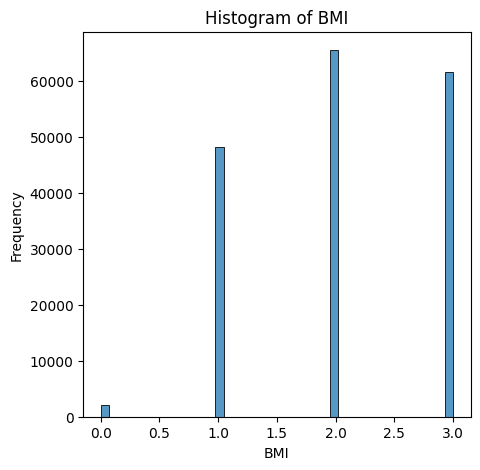

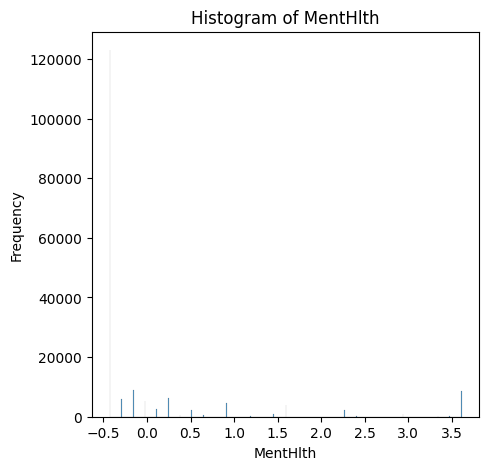

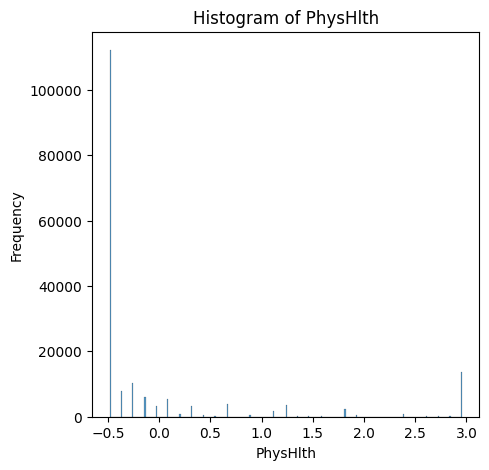

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Create kernel density plots for numerical [integer type] features (except Age)
density_plot_features = ['BMI', 'MentHlth', 'PhysHlth']

print(train_df[density_plot_features].dtypes)

for f in density_plot_features:
    plt.figure(figsize=(5, 5))
    sns.histplot(train_df[f], kde=False)
    plt.title(f'Histogram of {f}')
    plt.xlabel(f)
    plt.ylabel('Frequency')
    plt.show()


## PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)  # n_components=None means that all components will be kept
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Retrieve the eigenvectors (components)
eigenvectors = pca.components_

# Retrieve the eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

print(eigenvalues)

[9.65023439 4.81210378 1.55870157 0.83851687 0.69121494 0.63046604
 0.46049623 0.28274471 0.23517914 0.22798481 0.2107178  0.1660522
 0.15615376 0.12632361 0.09226431 0.07365888 0.07294573 0.05120801
 0.0414023  0.03516966 0.03346564]


Printing and Plotting the variance ratio of each principle components

In [11]:
num_comp = 1
for ratio in pca.explained_variance_ratio_:
    comp = "Component No. "
    text = comp + str(num_comp) + ":"

    print("Ratio of", text, ratio)
    num_comp += 1

Ratio of Component No. 1: 0.4719632380321301
Ratio of Component No. 2: 0.2353451728157271
Ratio of Component No. 3: 0.0762312922980814
Ratio of Component No. 4: 0.041009277023450155
Ratio of Component No. 5: 0.0338051936315431
Ratio of Component No. 6: 0.030834151832701332
Ratio of Component No. 7: 0.02252145202435988
Ratio of Component No. 8: 0.013828172824068017
Ratio of Component No. 9: 0.011501887165351403
Ratio of Component No. 10: 0.011150034569599425
Ratio of Component No. 11: 0.010305558453997958
Ratio of Component No. 12: 0.00812110180116959
Ratio of Component No. 13: 0.007636999566452119
Ratio of Component No. 14: 0.0061780987598296574
Ratio of Component No. 15: 0.004512363139572735
Ratio of Component No. 16: 0.003602429010021973
Ratio of Component No. 17: 0.0035675511960442303
Ratio of Component No. 18: 0.002504425879875216
Ratio of Component No. 19: 0.0020248587806509584
Ratio of Component No. 20: 0.0017200399069778377
Ratio of Component No. 21: 0.0016367012883957066


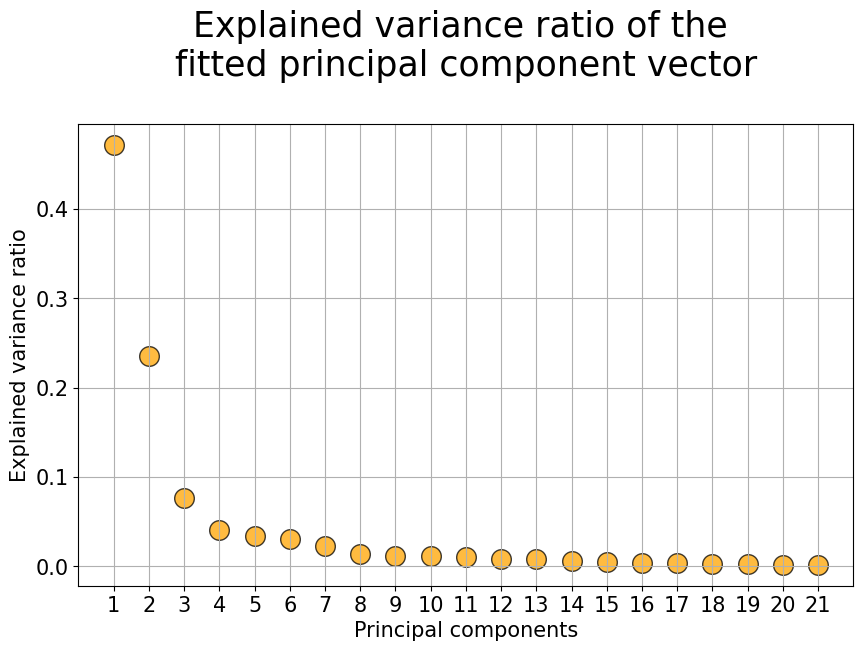

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.scatter(
    x=[i + 1 for i in range(len(pca.explained_variance_ratio_))],
    y=pca.explained_variance_ratio_,
    s=200,
    alpha=0.75,
    c="orange",
    edgecolor="k",
)
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n", fontsize=25)
plt.xlabel("Principal components", fontsize=15)
plt.xticks([i + 1 for i in range(len(pca.explained_variance_ratio_))], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio", fontsize=15)
plt.show()

The above plot illustrates that the $1^{st}$ principle component explains about 47% of the total variance in the data and the $2^{nd}$ component explains further 24%. This means that only the first two components already explain about 71% of the total variance and the remaining 19 components only 29%.

In [13]:
X_train_pca

array([[ 3.27690103e+00, -1.69879949e+00, -1.67040195e+00, ...,
        -3.98433413e-02, -1.75919092e-02, -9.13810901e-01],
       [-2.43964863e+00,  1.64190635e+00, -2.04024849e-01, ...,
         6.16542360e-02, -2.53268259e-03,  4.75915727e-02],
       [ 1.62067771e+00,  1.79417967e+00, -4.67492973e-01, ...,
         1.56061719e-02, -1.66789919e-02,  1.46922193e-02],
       ...,
       [ 4.80148798e+00, -3.87914000e+00, -2.72077910e+00, ...,
         4.26642416e-01, -5.85229546e-02, -6.38803599e-02],
       [-1.97850688e-01, -4.58406865e+00,  2.73515917e+00, ...,
         9.51843588e-03, -6.94902120e-02,  1.91088747e-03],
       [-5.35374427e+00,  9.98209788e-01,  4.31158071e-01, ...,
        -3.86129236e-01,  4.87056392e-02, -8.70533244e-01]])

In [14]:
x_train_pca_df = pd.DataFrame(data=X_train_pca)
x_train_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3.276901,-1.698799,-1.670402,0.587112,1.159114,1.284244,-0.402994,0.752104,-0.544977,-1.011687,...,-0.304876,0.255626,0.390229,0.814547,0.927301,-0.262990,-0.060255,-0.039843,-0.017592,-0.913811
1,-2.439649,1.641906,-0.204025,-0.133046,-0.519869,-0.956221,0.389852,0.850771,-0.211475,-0.450478,...,-0.036822,0.296305,0.320209,0.087652,-0.073599,-0.068322,-0.142209,0.061654,-0.002533,0.047592
2,1.620678,1.794180,-0.467493,0.364562,0.515341,0.347071,0.055191,-0.039615,0.161250,-0.184099,...,0.625800,0.071884,0.054012,-0.088173,0.025973,-0.103989,-0.042251,0.015606,-0.016679,0.014692
3,-3.452102,1.526932,0.113212,0.162225,0.501656,-0.109204,-0.071552,-0.629553,-0.344342,0.037845,...,0.175394,-0.813119,0.177430,-0.081401,0.840331,0.222604,-0.097528,0.385902,-0.004636,-0.026649
4,2.363460,3.042337,-0.462898,0.066831,0.171862,1.120288,-0.924850,0.401873,0.414893,-0.716576,...,0.631177,0.102906,-0.058100,-0.065585,0.059795,-0.080439,-0.105212,0.002924,-0.002163,0.023845


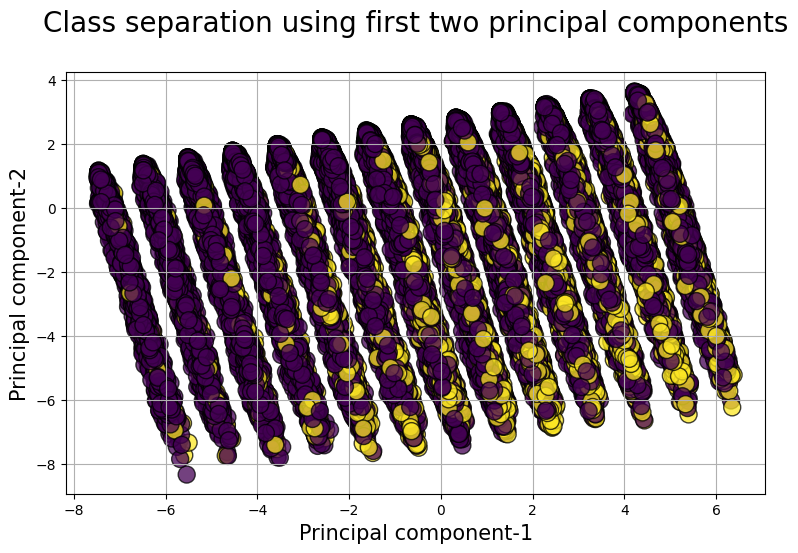

In [15]:
import numpy as np

# Get unique classes and map each class to a specific level for better visualization
unique_classes = np.unique(y_train)
class_levels = {cls: idx for idx, cls in enumerate(unique_classes)}

# Create new levels for each class for better separation in 1D plots
y_levels_pc1 = [class_levels[cls] for cls in y_train]  # Y-levels for PC1
x_levels_pc2 = [class_levels[cls] for cls in y_train]  # X-levels for PC2

plt.figure(figsize=(15, 10))

# 2D scatter plot for the first two principal components
plt.subplot(2, 2, 1)
plt.scatter(
    x_train_pca_df[0],
    x_train_pca_df[1],
    c=y_train,
    edgecolors="k",
    alpha=0.75,
    s=150,
)
plt.grid(True)
plt.title("Class separation using first two principal components\n", fontsize=20)
plt.xlabel("Principal component-1", fontsize=15)
plt.ylabel("Principal component-2", fontsize=15)

plt.tight_layout()
plt.show()

Save Principal Components as csv

In [16]:
# Convert remaining  principal components splits into DataFrames
train_pca_df = x_train_pca_df
val_pca_df = pd.DataFrame(data=X_val_pca)
test_pca_df = pd.DataFrame(data=X_test_pca)

# Include the y values in datframes
train_pca_df["Diabetes"] = y_train
val_pca_df["Diabetes"] = y_val
test_pca_df["Diabetes"] = y_test

In [17]:
train_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes
0,3.276901,-1.698799,-1.670402,0.587112,1.159114,1.284244,-0.402994,0.752104,-0.544977,-1.011687,...,0.255626,0.390229,0.814547,0.927301,-0.262990,-0.060255,-0.039843,-0.017592,-0.913811,0.0
1,-2.439649,1.641906,-0.204025,-0.133046,-0.519869,-0.956221,0.389852,0.850771,-0.211475,-0.450478,...,0.296305,0.320209,0.087652,-0.073599,-0.068322,-0.142209,0.061654,-0.002533,0.047592,0.0
2,1.620678,1.794180,-0.467493,0.364562,0.515341,0.347071,0.055191,-0.039615,0.161250,-0.184099,...,0.071884,0.054012,-0.088173,0.025973,-0.103989,-0.042251,0.015606,-0.016679,0.014692,0.0
3,-3.452102,1.526932,0.113212,0.162225,0.501656,-0.109204,-0.071552,-0.629553,-0.344342,0.037845,...,-0.813119,0.177430,-0.081401,0.840331,0.222604,-0.097528,0.385902,-0.004636,-0.026649,0.0
4,2.363460,3.042337,-0.462898,0.066831,0.171862,1.120288,-0.924850,0.401873,0.414893,-0.716576,...,0.102906,-0.058100,-0.065585,0.059795,-0.080439,-0.105212,0.002924,-0.002163,0.023845,0.0


In [18]:
# Storing each dataset into .csv file
train_pca_df.to_csv("../data/pca/dataset_train_pca.csv", index=False)
val_pca_df.to_csv("../data/pca/dataset_val_pca.csv", index=False)
test_pca_df.to_csv("../data/pca/dataset_test_pca.csv", index=False)

### how to load data with data_loader.py

In [19]:
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

data_loader = DataLoader()
X_train_pca, y_train_pca = data_loader.training_data_pca(n=3) # if no n is given all components will be returned
X_val_pca, y_val_pca = data_loader.validation_data_pca(3)
X_test_pca, y_test_pca = data_loader.test_data_pca(3)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"y_train_pca shape: {y_train_pca.shape}")
print(f"X_val_pca shape: {X_val_pca.shape}")
print(f"y_val_pca shape: {y_val_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")
print(f"y_test_pca shape: {y_test_pca.shape}")

X_train_pca shape: (177576, 3)
y_train_pca shape: (177576,)
X_val_pca shape: (25875, 3)
y_val_pca shape: (25875,)
X_test_pca shape: (50229, 3)
y_test_pca shape: (50229,)


### how to load data in a dataframe

In [20]:
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

data_loader = DataLoader()
train_df_pca = data_loader.training_dataframe_pca(3)
val_df_pca = data_loader.validation_dataframe_pca(3)
test_df_pca = data_loader.test_dataframe_pca(3)

train_df_pca.head()

,0,1,2,Diabetes
0,3.276901,-1.698799,-1.670402,0.0
1,-2.439649,1.641906,-0.204025,0.0
2,1.620678,1.794180,-0.467493,0.0
3,-3.452102,1.526932,0.113212,0.0
4,2.363460,3.042337,-0.462898,0.0


## Over- and Undersampling

### Random Oversampling

In [21]:
# apply random oversampling to training set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train_preprocessed, y_train)

print(f"X_resampled shape: {X_oversampled.shape}")
print(f"y_resampled shape: {y_oversampled.shape}")

# Show class distributions
print("\nClass distribution before oversampling:")
print(y_train.value_counts())

print("\nClass distribution after oversampling:")
print(y_oversampled.value_counts())

X_resampled shape: (299184, 21)
y_resampled shape: (299184,)

Class distribution before oversampling:
Diabetes
0.0    149592
1.0     27984
Name: count, dtype: int64

Class distribution after oversampling:
Diabetes
0.0    149592
1.0    149592
Name: count, dtype: int64


In [22]:
# Convert preprocessed resampled training set back into DataFrame with correct column names
train_preprocessed_oversampled_df = pd.DataFrame(X_oversampled, columns=column_names)

# Include the y values in the dataframe
train_preprocessed_oversampled_df["Diabetes"] = y_oversampled.values

# Storing each dataset into .csv file
train_preprocessed_oversampled_df.to_csv(
    "../data/resampling/dataset_train_oversampled.csv", index=False
)

### SMOTE Oversampling

In [23]:
# apply synthetic oversampling with SMOTE to training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_oversampled_smote, y_oversampled_smote = smote.fit_resample(X_train, y_train)

print(f"X_resampled shape: {X_oversampled_smote.shape}")
print(f"y_resampled shape: {y_oversampled_smote.shape}")

# Show class distributions
print("\nClass distribution before oversampling:")
print(y_train.value_counts())

print("\nClass distribution after oversampling:")
print(y_oversampled_smote.value_counts())

X_resampled shape: (299184, 21)
y_resampled shape: (299184,)

Class distribution before oversampling:
Diabetes
0.0    149592
1.0     27984
Name: count, dtype: int64

Class distribution after oversampling:
Diabetes
0.0    149592
1.0    149592
Name: count, dtype: int64


In [24]:
# Convert preprocessed resampled training set back into DataFrame with correct column names
train_preprocessed_oversampled_smote_df = pd.DataFrame(X_oversampled_smote, columns=column_names)

# Include the y values in the dataframe
train_preprocessed_oversampled_smote_df["Diabetes"] = y_oversampled_smote.values

# Storing each dataset into .csv file
train_preprocessed_oversampled_smote_df.to_csv(
    "../data/resampling/dataset_train_oversampled_smote.csv", index=False
)

### SMOTE Tomek

In [25]:
# apply SMOTE Tomek to training set
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train_preprocessed, y_train)

print(f"X_resampled shape: {X_smote_tomek.shape}")
print(f"y_resampled shape: {y_smote_tomek.shape}")

# Show class distributions
print("\nClass distribution before SMOTE Tomek:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE Tomek:")
print(y_smote_tomek.value_counts())

X_resampled shape: (298548, 21)
y_resampled shape: (298548,)

Class distribution before SMOTE Tomek:
Diabetes
0.0    149592
1.0     27984
Name: count, dtype: int64

Class distribution after SMOTE Tomek:
Diabetes
0.0    149274
1.0    149274
Name: count, dtype: int64


In [26]:
# Convert preprocessed resampled training set back into DataFrame with correct column names
train_preprocessed_smote_tomek_df = pd.DataFrame(X_smote_tomek, columns=column_names)

# Include the y values in the dataframe
train_preprocessed_smote_tomek_df["Diabetes"] = y_smote_tomek.values

# Storing each dataset into .csv file
train_preprocessed_smote_tomek_df.to_csv("../data/resampling/dataset_train_smote_tomek.csv", index=False)

### Random Undersampling

In [27]:
# apply random undersampling to training set
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_train_preprocessed, y_train)

print(f"X_resampled shape: {X_undersampled.shape}")
print(f"y_resampled shape: {y_undersampled.shape}")

# Show class distributions
print("\nClass distribution before undersampling:")
print(y_train.value_counts())

print("\nClass distribution after undersampling:")
print(y_undersampled.value_counts())

X_resampled shape: (55968, 21)
y_resampled shape: (55968,)

Class distribution before undersampling:
Diabetes
0.0    149592
1.0     27984
Name: count, dtype: int64

Class distribution after undersampling:
Diabetes
0.0    27984
1.0    27984
Name: count, dtype: int64


In [28]:
# Convert preprocessed resampled training set back into DataFrame with correct column names
train_preprocessed_undersampled_df = pd.DataFrame(X_undersampled, columns=column_names)

# Include the y values in the dataframe
train_preprocessed_undersampled_df["Diabetes"] = y_undersampled.values

# Storing each dataset into .csv file
train_preprocessed_undersampled_df.to_csv(
    "../data/resampling/dataset_train_undersampled.csv", index=False
)

### how to load data with data_loader.py

Note that when using resampling one should still use the unbalanced validation and test splits as these should represent the original, real-world distribution of the data.

Example shown for random under-sampling: `training_data_undersampling_random`. You can also use `training_data_oversampling_random` and `training_data_oversampling_smote`, as well as load a dataframe similar as before. 

In [29]:
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

data_loader = DataLoader()
X_train_undersampling_random, y_train_undersampling_random = (
    data_loader.training_data_undersampling_random
)
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_undersampling_random shape: {X_train_undersampling_random.shape}")
print(f"y_train_undersampling_random shape: {y_train_undersampling_random.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_undersampling_random shape: (55968, 21)
y_train_undersampling_random shape: (55968,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)
